<a href="https://colab.research.google.com/github/aalr007/VisionComputacional/blob/main/9.4_segmentation_otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Visión computacional para imágenes y video*** </center>
## <center> ***Otsu Thresholding*** </center>
### Profesor: Gilberto Ochoa Ruiz
### Alumnos:
* Alberto Nieves Cisneros            A01793829
* Aurelio Antonio Lozano Rábago      A01081266
* Héctor Manuel González Villareal   A00178679
* Jessica Lechuga Ramos              A01793512
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> 12 de Marzo del 2023 </p>

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Instrucciones
1. Revisar los ejercicios propuestos antes de codificar e identificar las secciones de libro o de las diapositivas que te puedan servir como soporte
2. Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuales son las limitaciones de single thresholding contra el algoritmo de Otsu
3. (Opcional) Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [10]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np
import matplotlib.pylab as plt
import cv2
import numpy as np
from skimage.morphology import binary_dilation
from skimage.segmentation import clear_border,find_boundaries
from skimage.morphology import disk
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import find_contours
from skimage.morphology import remove_small_holes, remove_small_objects
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import find_contours
from skimage.morphology import binary_closing
from skimage.measure import label, regionprops

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

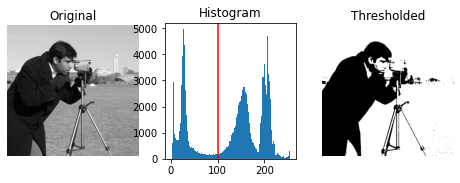

In [11]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

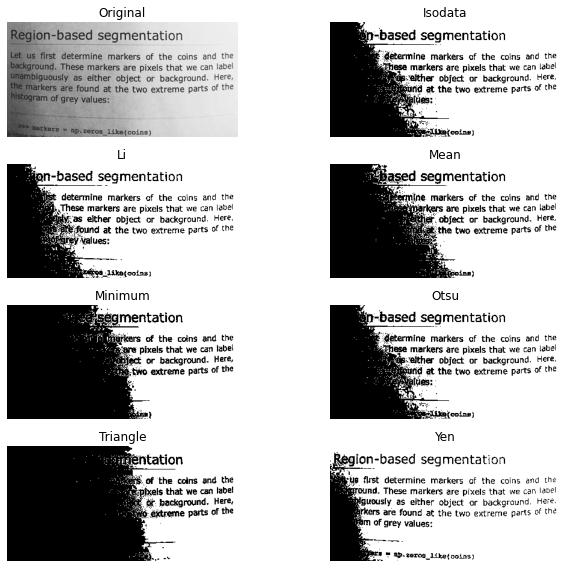

In [12]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

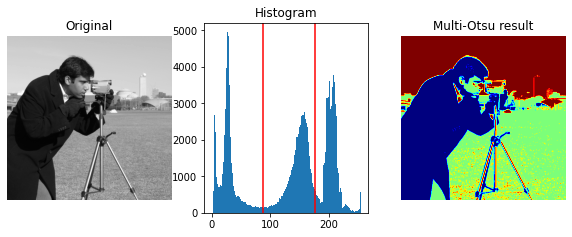

In [13]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# CASO 1: ESTUCHE

In [14]:
!wget https://www.dropbox.com/s/f73bis9jnz3a9ic/estuche.png

--2023-03-12 00:32:44--  https://www.dropbox.com/s/f73bis9jnz3a9ic/estuche.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/f73bis9jnz3a9ic/estuche.png [following]
--2023-03-12 00:32:45--  https://www.dropbox.com/s/raw/f73bis9jnz3a9ic/estuche.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc60462f0a0576abb31fd0aa8235.dl.dropboxusercontent.com/cd/0/inline/B4GiMqpPAgxUD7TJRFB848KjRoMMSAME7aiZrFDHlXJzr3NHmQ13moi6PIkQPW4KXZG5PYB9h1oHNi2aNir_3tQCY9tbSWOwy9PZB9pSBZENhZfXKfX9wfkuejB-1NEWLNH8tg8n28c2KmQG3kY4nceasbVO9UcbdN60A0IbNgmvFA/file# [following]
--2023-03-12 00:32:45--  https://uc60462f0a0576abb31fd0aa8235.dl.dropboxusercontent.com/cd/0/inline/B4GiMqpPAgxUD7TJRFB848KjRoMMSAME7aiZrFDHlXJzr3NHmQ13moi6PIkQPW4KXZG5PYB9h1oHNi2a

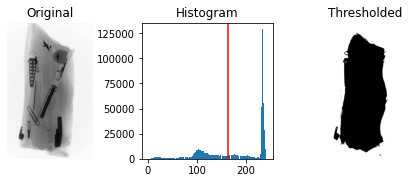

In [15]:
image = cv2.imread('estuche.png',0)
#image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

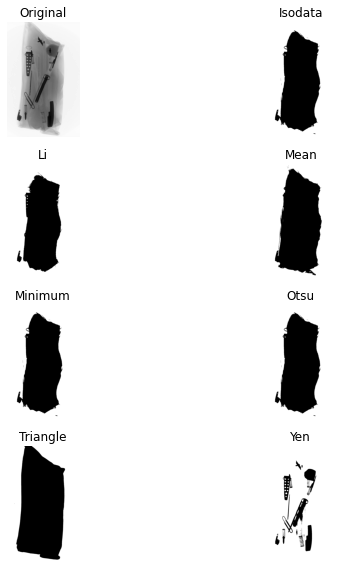

In [16]:
from skimage.filters import try_all_threshold

img = cv2.imread('estuche.png',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




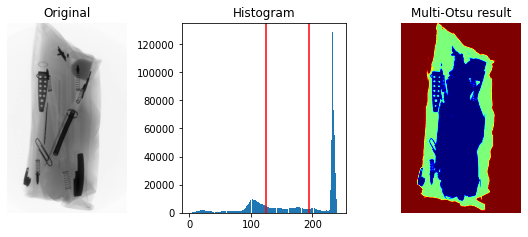

In [17]:
# The input image.
image = cv2.imread('estuche.png',0)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# CASO 2: Tazmaia


In [18]:
!wget https://www.dropbox.com/s/ccebfv6fhlk6h4q/tazmania.png

--2023-03-12 00:32:50--  https://www.dropbox.com/s/ccebfv6fhlk6h4q/tazmania.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ccebfv6fhlk6h4q/tazmania.png [following]
--2023-03-12 00:32:51--  https://www.dropbox.com/s/raw/ccebfv6fhlk6h4q/tazmania.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9358c9910b557410811477ef52.dl.dropboxusercontent.com/cd/0/inline/B4GI_HzC4_7zqrZ3Y2Ux6Skm45-h6kslIK5iipEg2E6dlTzmbXRU6-wISmHmDMclI4_KWRgiRSIA21O0-Gi4rAxfim0ucxA0H33ZnKAQmc3R1Vv20t8aiuw4qhDiRirYFizV6enzTPIPYAMDSU0iBtAEvr6Pt9-0bYEEv1Aa35tliA/file# [following]
--2023-03-12 00:32:51--  https://uc9358c9910b557410811477ef52.dl.dropboxusercontent.com/cd/0/inline/B4GI_HzC4_7zqrZ3Y2Ux6Skm45-h6kslIK5iipEg2E6dlTzmbXRU6-wISmHmDMclI4_KWRgiRSIA2

(-0.5, 1743.5, 1165.5, -0.5)

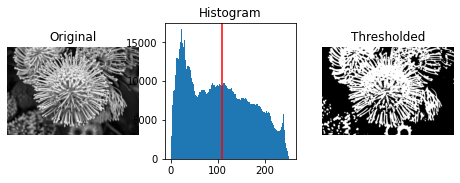

In [19]:
image = cv2.imread('tazmania.png',0)
#image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')


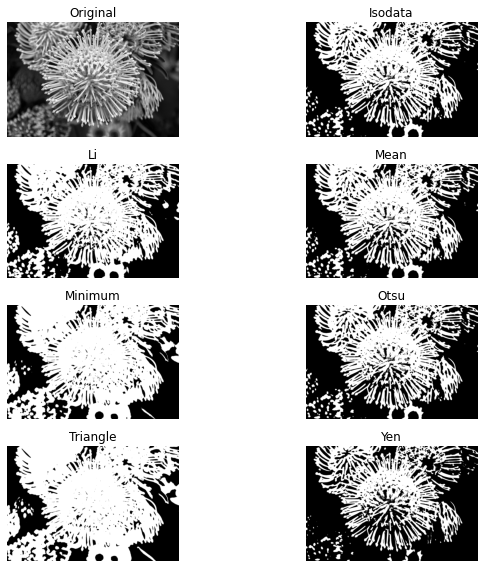

In [20]:
from skimage.filters import try_all_threshold

img = cv2.imread('tazmania.png',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

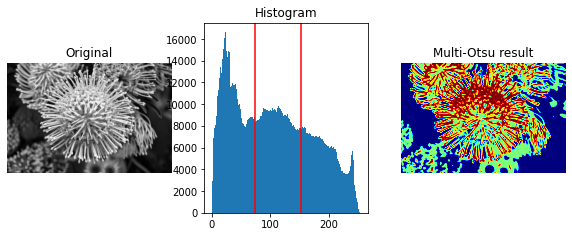

In [21]:
# The input image.
image = cv2.imread('tazmania.png',0)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [22]:
# TODO: Slide image for segmentation, alpha blerding

# RETO

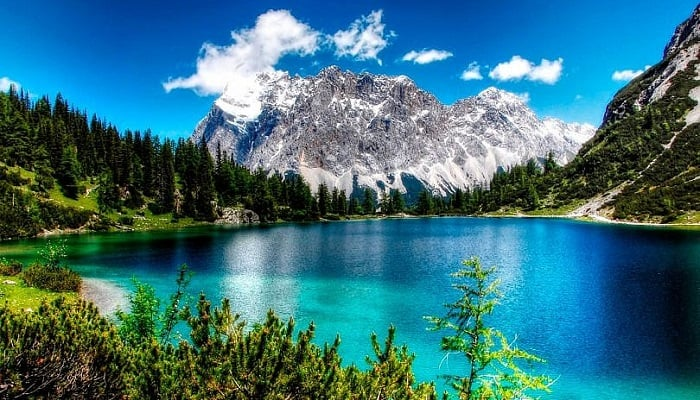

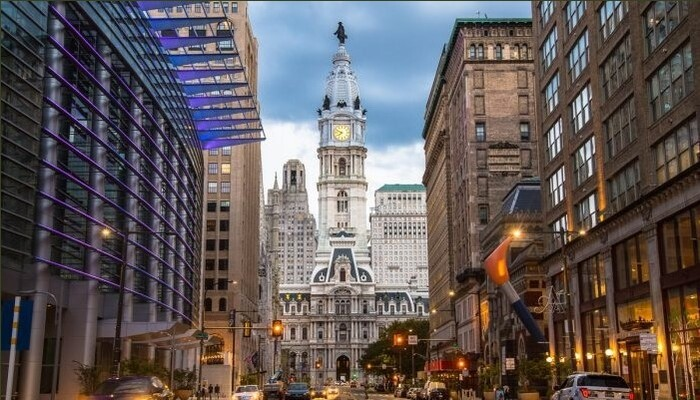

In [36]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

src1 = cv2.imread(cv2.samples.findFile('sample_data/image.jpg'))
src2 = cv2.imread(cv2.samples.findFile('sample_data/image2.jpg'))

cv2_imshow(src1)
cv2_imshow(src2)

In [38]:
src1.shape

(400, 700, 3)

In [37]:
src2.shape

(400, 700, 3)

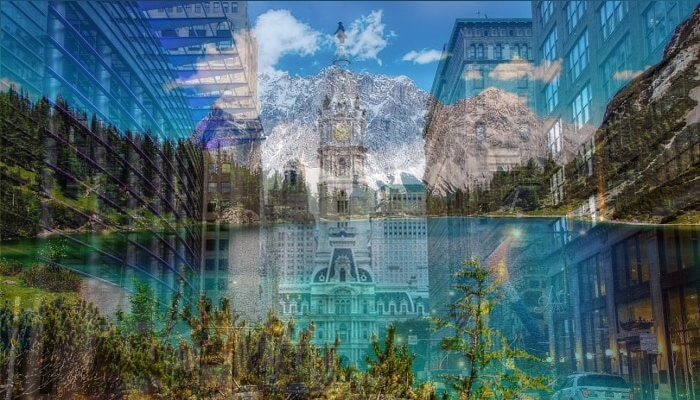

In [39]:
alpha = 0.5
beta = (1.0 - alpha)
dst = cv2.addWeighted(src1, alpha, src2, beta, 0.0)
cv2_imshow(dst)

# CASO 3: Reloj

In [40]:
!wget https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png

--2023-03-12 01:01:25--  https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gr195hwmjebq8b/clock.png [following]
--2023-03-12 01:01:25--  https://www.dropbox.com/s/raw/7gr195hwmjebq8b/clock.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd816b08e6ace77ebfe3544ac27.dl.dropboxusercontent.com/cd/0/inline/B4F1KXLH3fNQZGxnmIVHYeAM8TkBw3mKUwbCBBd8UJgNZy8NsCVphZnsF1Y84q3G_Op7GhNVVZ3XKxlYpS_2ETag4lyeKSbPcBw6_pPpVn3X_EtFB6MpZ5Dd6TBfgbL0PuCww-U9IolWtIQJ_VgIQ8SK3frqQBwoE_q9VpzCuJO1bw/file# [following]
--2023-03-12 01:01:26--  https://ucd816b08e6ace77ebfe3544ac27.dl.dropboxusercontent.com/cd/0/inline/B4F1KXLH3fNQZGxnmIVHYeAM8TkBw3mKUwbCBBd8UJgNZy8NsCVphZnsF1Y84q3G_Op7GhNVVZ3XKxlYpS_2ETa

(-0.5, 1007.5, 755.5, -0.5)

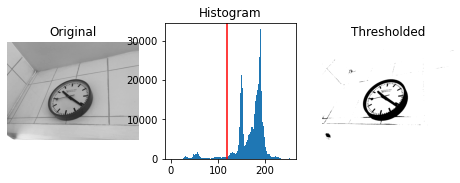

In [41]:
image = cv2.imread('clock.png',0)
#image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

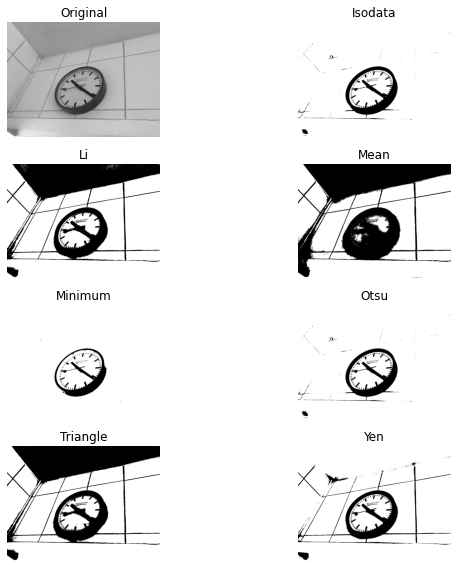

In [42]:
from skimage.filters import try_all_threshold

img = cv2.imread('clock.png',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

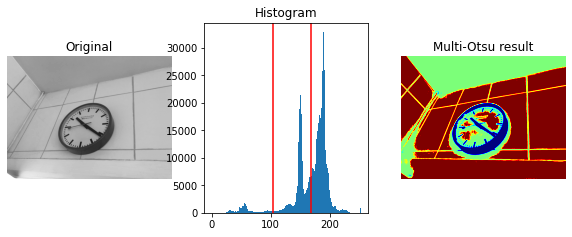

In [43]:
# The input image.
image = cv2.imread('clock.png',0)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

#3
(Opcional) Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.

In [44]:
import cv2
 
img = cv2.imread('sample_data/book.jpg')
 
# cv2.imread() -> takes an image as an input
h, w, channels = img.shape

#this is the vertical division 
half = w//2
# this is horizontal division
third = h//3

UL = img[:third,:half]
UR = img[:third,half:] 
ML = img[third:2*third,:half]
MR = img[third:2*third,half:]
BL = img[2*third:,:half]
BR = img[2*third:,half:]
 
 
 
# saving all the images
# cv2.imwrite() function will save the image
# into your pc
cv2.imwrite('sample_data/UL.jpg', UL)
cv2.imwrite('sample_data/UR.jpg', UR)
cv2.imwrite('sample_data/ML.jpg', ML)
cv2.imwrite('sample_data/MR.jpg', MR)
cv2.imwrite('sample_data/BL.jpg', BL)
cv2.imwrite('sample_data/BR.jpg', BR)


AttributeError: ignored

In [ ]:

 
img = cv2.imread('estuche.png',0)
 
# cv2.imread() -> takes an image as an input
h, w, channels = img.shape

#this is the vertical division 
half = w//2
# this is horizontal division
third = h//3

UL = img[:third,:half]
UR = img[:third,half:] 
ML = img[third:2*third,:half]
MR = img[third:2*third,half:]
BL = img[2*third:,:half]
BR = img[2*third:,half:]
 
 
 
# saving all the images
# cv2.imwrite() function will save the image
# into your pc
cv2.imwrite('sample_data/UL.jpg', UL)
cv2.imwrite('sample_data/UR.jpg', UR)
cv2.imwrite('sample_data/ML.jpg', ML)
cv2.imwrite('sample_data/MR.jpg', MR)
cv2.imwrite('sample_data/BL.jpg', BL)
cv2.imwrite('sample_data/BR.jpg', BR)

In [ ]:
cv2_imshow(UL)
cv2_imshow(UR)

In [ ]:
cv2_imshow(ML)
cv2_imshow(MR)


In [ ]:
cv2_imshow(BL)
cv2_imshow(BR)

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

In [ ]:
img = cv2.imread('sample_data/book.jpg',0)
thresh = threshold_otsu(img)
binary = img > thresh


In [ ]:
cv2_imshow(img)
cv2_imshow(binary)

In [ ]:
from skimage.filters import try_all_threshold

img = cv2.imread('sample_data/UL.jpg',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
img = cv2.imread('sample_data/UR.jpg',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
img = cv2.imread('sample_data/ML.jpg',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
img = cv2.imread('sample_data/MR.jpg',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
img = cv2.imread('sample_data/BL.jpg',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
img = cv2.imread('sample_data/BR.jpg',0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()